## Retrieve Frequency Counts for Users

In [1]:
import os, json
from os import path
import pandas as pd
import numpy as np
import glob
pd.set_option('display.max_columns', None)

#FJERN POLITIFACT 14548 - 1054731691875618829 ELLER KJØR MED ERRORS=SURROGATEESCAPE 
#GJENTA FOR REAL
fakeArticlesPD = pd.DataFrame()
realArticlesPD = pd.DataFrame()
fakeUsers = {}
realUsers = {}

for i in range(2):
    if i == 0:
        authenticity = 'fake'
    else:
        authenticity = 'real'
    rootdir = 'C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/'+authenticity
    
    for subdir, dirs, articles in os.walk(rootdir):
        for article in dirs:
            #print(subdir)
            temp = pd.DataFrame()
            #path_to_json = 'C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact11773/tweets' 
            path_to_json = 'C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/' + authenticity + '/'+ article + '/tweets' 
            #print(path_to_json)
            json_pattern = os.path.join(path_to_json,'*.json')
            file_list = glob.glob(json_pattern)

            for file in file_list:
                #print(file)
                try:
                    data = pd.read_json(open(file, "r", encoding="utf8", errors="surrogateescape"), lines=True)
                    temp = temp.append(data, ignore_index = True)
                    data = pd.read_json(open(file, "r", encoding="utf8", errors="surrogateescape"), lines=True)
                    if authenticity == 'fake':
                        fakeArticlesPD = fakeArticlesPD.append(data, ignore_index = True)
                    else:
                        realArticlesPD = realArticlesPD.append(data, ignore_index = True)
                    break
                except ValueError:
                    print("ValueError")
        #print(temp["user"][0]['id'])
        #print(temp['retweets'][13][0]['user']['id'])


        #FINN UNIKE VERDIER UNDER USER I TEMP: 
            users = list() #LAG LISTE HELLER
            texts = list()
            if "user" in temp.keys():
                for dic in temp["user"]:
                    if dic['id'] not in users:
                        users.append(dic['id'])
        
            temp = pd.DataFrame()        
        #path_to_json = 'C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact11773/retweets' 
            path_to_json = 'C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/'+authenticity+'/'+article+'/retweets' 
            #print(path_to_json)
            json_pattern = os.path.join(path_to_json,'*.json')
            file_list = glob.glob(json_pattern)

            for file in file_list:
            #print(file)
                try:
                    data = pd.read_json(open(file, "r", encoding="utf8", errors="surrogateescape"), lines=True)
                    temp = temp.append(data, ignore_index = True)
                    if authenticity == 'fake':
                        fakeArticlesPD = fakeArticlesPD.append(data, ignore_index = True)
                    else:
                        realArticlesPD = realArticlesPD.append(data, ignore_index = True)
                    break
                except ValueError:
                    print("ValueError")
        #print(temp["user"][0]['id'])
        #print(temp['retweets'][13][0]['user']['id'])



        #FINN UNIKE VERDIER UNDER USER I TEMP: 
        #users = list() #LAG LISTE HELLER
            if "retweets" in temp.keys():
                for lst in temp["retweets"]:
                    if len(lst)>0:
                        #print(lst)
                        if lst[0]['user']['id'] not in users:
                            users.append(lst[0]['user']['id'])

            if i == 0:
            #Initialize dict
                for user in users:
                    if user not in fakeUsers.keys():
                        fakeUsers[user] = 0
            #increment usercounts
                for fakeUser in fakeUsers:
                    fakeUsers[fakeUser] = fakeUsers[fakeUser]+1
                #print(fakeUsers)
            elif i == 1:
                #Initialize dict
                for user in users:
                    if user not in realUsers.keys():
                        realUsers[user] = 0
                #increment usercounts
                for realUser in realUsers:
                    realUsers[realUser] = realUsers[realUser]+1
                #print(realUsers)
    #if authenticity == 'fake':
    #    realUsersPD['fake'] = 'true'
    #else:
    #    fakeUsersPD['fake'] = 'false'
    
#for articles..
#fakeArticles.append('politifact11773') #legg til alle articles for plot

C:\Users\henri\Anaconda3\lib\site-packages\pandas\core\frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


## Plot tweetcount per user and label real/fake

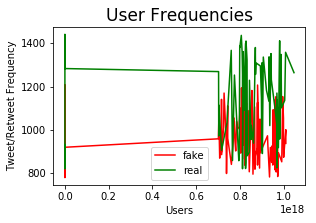

In [3]:
import matplotlib.pylab as plt

lists = sorted(fakeUsers.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

fig, ax = plt.subplots(figsize=(5, 3))
fig.subplots_adjust(bottom=0.15, left=0.2)

ax.plot(x, y, 'r', label='fake')

lists = sorted(realUsers.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

ax.plot(x, y, 'g', label='real')

ax.set_xlabel('Users')
ax.set_ylabel('Tweet/Retweet Frequency')
ax.legend()
plt.title("User Frequencies", fontsize=17)
plt.show()

## Histogram Plot for Users/Tweets with Labels

(1175221, 5971922, 8726812, 8953122, 11335322, 13337152, 14131630, 14338931, 14345062, 14378429, 15244807, 15359014, 15521063, 15755670, 15995652, 16094355, 16193250, 16477823, 16491845, 16521268, 17202571, 17309068, 17744351, 18378334, 18479878, 18553742, 18643437, 18856867, 19211550, 19592688, 20419354, 20741163, 20867106, 21032566, 21726566, 22420450, 22794878, 23452333, 24161006, 25648003, 26760483, 27656375, 28854023, 29010023, 29226383, 29315071, 30051241, 31288110, 32910422, 35849681, 35907241, 36932536, 37403994, 38851049, 39253975, 39818855, 40309288, 43107259, 44781669, 48267697, 49091628, 49814519, 49884490, 51085942, 51207313, 53946245, 54169562, 55220541, 56177108, 59296053, 65109514, 66576036, 70749151, 72166789, 73292019, 74780139, 76937426, 79871519, 81354135, 85085807, 91736511, 100513430, 104640168, 107773189, 108151209, 109161557, 111332093, 118218465, 122495401, 122853659, 124267704, 124859062, 129262130, 133018525, 135344744, 135517410, 137741758, 139545790, 141422

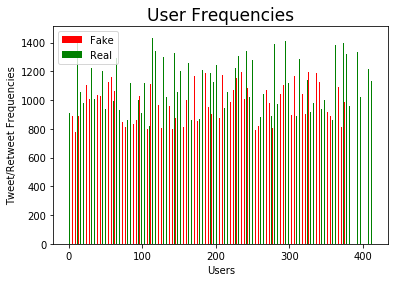

In [4]:
lists = sorted(fakeUsers.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples
print(x)
lists2 = sorted(realUsers.items()) # sorted by key, return a list of tuples

x2, y2 = zip(*lists2) # unpack a list of pairs into two tuples
print(x2)
ax = plt.subplot(111)
ax.bar(np.arange(len(x)), y, width=0.2, color='r', align='center')
ax.bar(np.arange(len(x2))-0.2, y2, width=0.2, color='g', align='center')
ax.legend(('Fake','Real'))
ax.set_xlabel('Users')
ax.set_ylabel('Tweet/Retweet Frequencies')
plt.title("User Frequencies", fontsize=17)
plt.show()

## Kernel Density Function (KDE) Histogram for Users/Tweets with Labels

C:\Users\henri\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


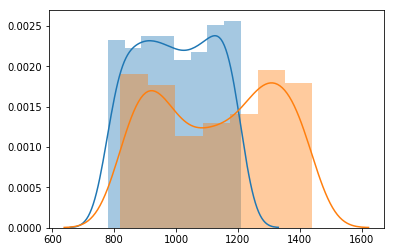

In [5]:
import seaborn as sns
import matplotlib.pylab as plt

lists = sorted(fakeUsers.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

sns.distplot(y)

lists = sorted(realUsers.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

sns.distplot(y)

## Ratio-Plot

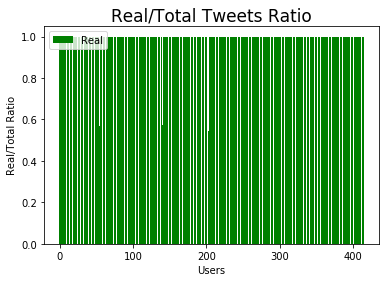

In [6]:
#Ratio-Plot
import matplotlib.pylab as plt

#merge dicts
def divide(dividends, divisors):
    ret = dict()
    for key, dividend in dividends.items():
        ret[key] = dividend/(divisors.get(key, 1)+dividend)
    if key not in ret.keys():
        for key, divisor in divisors.items():
            ret[key] = dividends.get(key, 1)/(divisor+dividends.get(key,1))
    return ret# sorted by key, return a list of tuples

d3 = {}
d3 = divide(realUsers,fakeUsers)
x, y = zip(*d3.items()) # unpack a list of pairs into two tuples
ax = plt.subplot(111)
ax.bar(np.arange(len(x)), y, color='g', align='center')
ax.legend(('Real','Fake'))
ax.set_xlabel('Users')
ax.set_ylabel('Real/Total Ratio')
plt.title("Real/Total Tweets Ratio", fontsize=17)
plt.show()

## CDF Plot

C:\Users\henri\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Text(0, 0.5, 'Probability')

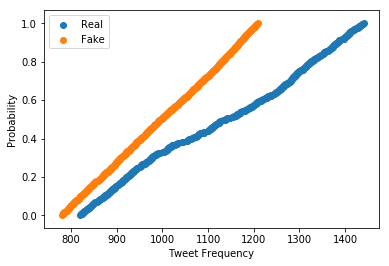

In [7]:
#CDF
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

realTemp=list(realUsers.values())
ax = plt.subplot(111)
x = np.sort(realTemp)
n = x.size
y = np.arange(1, n+1) / n

ax.scatter(x=x, y=y);

fakeTemp=list(fakeUsers.values())
ax = plt.subplot(111)
x = np.sort(fakeTemp)
n = x.size
y = np.arange(1, n+1) / n

ax.scatter(x=x, y=y);

ax.legend(('Real','Fake'))
ax.set_xlabel('Tweet Frequency')
ax.set_ylabel('Probability')

## TF-IDF

In [8]:
exploded = fakeArticlesPD.user.apply(pd.Series)
exploded.columns = [str(col) + '_user' for col in exploded.columns]
fakeArticlesPD = pd.concat([fakeArticlesPD.drop(columns='user'), exploded], axis=1)

exploded = realArticlesPD.user.apply(pd.Series)
exploded.columns = [str(col) + '_user' for col in exploded.columns]
realArticlesPD = pd.concat([realArticlesPD.drop(columns='user'), exploded], axis=1)

### TF

In [16]:
fakeArticlesTermFreq = {}
fakeArticlesTermFreq['user'] = {}
realArticlesTermFreq = {}
realArticlesTermFreq['user'] = {}
terms = {}

for user in fakeUsers:
    #if not fakeArticlesPD.loc[fakeArticlesPD['id_user'] == user].empty:
    rows = []
    #print(fakeArticlesPD.loc[fakeArticlesPD['id_user'] == user]['id_user'].index.values)
    rows.append(fakeArticlesPD.loc[fakeArticlesPD['id_user'] == user].index.values)
    #print(fakeArticlesPD.loc[fakeArticlesPD['id_user'] == user].index.values)
    terms = {}
    if user not in terms.keys():
        terms[user] = []
    if user not in fakeArticlesTermFreq.keys():
            fakeArticlesTermFreq[user] = {}
    for i, row in enumerate(rows):
        #print(fakeArticlesPD['text'][row])
        terms[user].append(fakeArticlesPD['text'][row].str.split())
        words = str(terms[user][i])
        wordsList = words.split()
        #remove symbols
        wordsList = [i.strip(']./,+_-?:\[') for i in wordsList]
        #uniqueWords = set(wordsList)
        #print(uniqueWords)
        uniqueWords = []
        for word in wordsList:
            #print(word)
            counts = {}
            if word not in counts.keys():
                uniqueWords.append(word)
                counts[word] = 0
            counts[word] += 1
        for word in uniqueWords:
            if word not in fakeArticlesTermFreq[user].keys():
                fakeArticlesTermFreq[user][word] = 0
            for n_word in counts:
            #print(counts[n_word])
                fakeArticlesTermFreq[user][word]=counts[n_word]/len(wordsList)
    #print(fakeArticlesTermFreq[user])
    #print(fakeUsersTermFreq[user])
    

for user in realUsers:
    #if not fakeArticlesPD.loc[fakeArticlesPD['id_user'] == user].empty:
    rows = []
    #print(fakeArticlesPD.loc[fakeArticlesPD['id_user'] == user]['id_user'].index.values)
    rows.append(realArticlesPD.loc[realArticlesPD['id_user'] == user].index.values)
    #print(fakeArticlesPD.loc[fakeArticlesPD['id_user'] == user].index.values)
    terms = {}
    if user not in terms.keys():
        terms[user] = []
    if user not in realArticlesTermFreq.keys():
            realArticlesTermFreq[user] = {}
    for i, row in enumerate(rows):
        #print(fakeArticlesPD['text'][row])
        terms[user].append(realArticlesPD['text'][row].str.split())
        words = str(terms[user][i])
        wordsList = words.split()
        #remove symbols
        wordsList = [i.strip(']./,+_-?:\[') for i in wordsList]
        #uniqueWords = set(wordsList)
        #print(uniqueWords)
        uniqueWords = []
        for word in wordsList:
            #print(word)
            counts = {}
            if word not in counts.keys():
                uniqueWords.append(word)
                counts[word] = 0
            counts[word] += 1
        for word in uniqueWords:
            if word not in realArticlesTermFreq[user].keys():
                realArticlesTermFreq[user][word] = 0
            for n_word in counts:
            #print(counts[n_word])
                realArticlesTermFreq[user][word]=counts[n_word]/len(wordsList)
    print(realArticlesTermFreq[user])
    #print(fakeUsersTermFreq[user])

{'0': 0.09090909090909091, 'The': 0.09090909090909091, 'Foxxhole': 0.09090909090909091, 'Best': 0.09090909090909091, 'Guest': 0.09090909090909091, 'Nominees': 0.09090909090909091, '11.27.2': 0.09090909090909091, 'Name': 0.09090909090909091, 'text': 0.09090909090909091, 'dtype': 0.09090909090909091, 'object': 0.09090909090909091}
{'2': 0.08333333333333333, '#tbrs': 0.08333333333333333, '#tcot': 0.08333333333333333, '#sgp': 0.08333333333333333, '"Donald': 0.08333333333333333, 'Trump': 0.08333333333333333, 'on': 0.08333333333333333, 'Miss': 0.08333333333333333, 'Name': 0.08333333333333333, 'text': 0.08333333333333333, 'dtype': 0.08333333333333333, 'object': 0.08333333333333333}
{'4': 0.09090909090909091, '@TheDemocrats': 0.09090909090909091, 'sure': 0.09090909090909091, 'have': 0.09090909090909091, 'a': 0.09090909090909091, 'defeatist': 0.09090909090909091, 'ment': 0.09090909090909091, 'Name': 0.09090909090909091, 'text': 0.09090909090909091, 'dtype': 0.09090909090909091, 'object': 0.0909

{'52': 0.09090909090909091, 'CNN': 0.09090909090909091, 'Reporter': 0.09090909090909091, 'Edit’s': 0.09090909090909091, 'Hillary': 0.09090909090909091, 'Clinton’s': 0.09090909090909091, 'Re': 0.09090909090909091, 'Name': 0.09090909090909091, 'text': 0.09090909090909091, 'dtype': 0.09090909090909091, 'object': 0.09090909090909091}
{'54': 0.09090909090909091, 'Inquiry': 0.09090909090909091, 'Sought': 0.09090909090909091, 'in': 0.09090909090909091, 'Hillary': 0.09090909090909091, 'Clinton’s': 0.09090909090909091, 'Use': 0.09090909090909091, 'Name': 0.09090909090909091, 'text': 0.09090909090909091, 'dtype': 0.09090909090909091, 'object': 0.09090909090909091}
{'56': 0.08333333333333333, 'Insider': 0.08333333333333333, 'trading': 0.08333333333333333, 'How': 0.08333333333333333, 'Congress': 0.08333333333333333, 'Can': 0.08333333333333333, 'Make': 0.08333333333333333, '': 0.08333333333333333, 'Name': 0.08333333333333333, 'text': 0.08333333333333333, 'dtype': 0.08333333333333333, 'object': 0.08

{'110': 0.09090909090909091, 'Memory': 0.09090909090909091, 'Lapse': 0.09090909090909091, 'Trump': 0.09090909090909091, 'Seeks': 0.09090909090909091, 'Distance': 0.09090909090909091, 'From': 0.09090909090909091, 'Name': 0.09090909090909091, 'text': 0.09090909090909091, 'dtype': 0.09090909090909091, 'object': 0.09090909090909091}
{'112': 0.1, 'Chairman’s': 0.1, 'Mark': 0.1, 'America’s': 0.1, 'Healthy': 0.1, 'Future': 0.1, 'Name': 0.1, 'text': 0.1, 'dtype': 0.1, 'object': 0.1}
{'114': 0.09090909090909091, '@NBCNews': 0.09090909090909091, '@MeetThePress': 0.09090909090909091, 'Which': 0.09090909090909091, 'Trump': 0.09090909090909091, 'will': 0.09090909090909091, '': 0.09090909090909091, 'Name': 0.09090909090909091, 'text': 0.09090909090909091, 'dtype': 0.09090909090909091, 'object': 0.09090909090909091}
{'116': 0.07692307692307693, 'Michelle': 0.07692307692307693, 'Obama': 0.07692307692307693, 'Says': 0.07692307692307693, 'That': 0.07692307692307693, 'She': 0.07692307692307693, 'Is': 0.0

{'184': 0.08333333333333333, 'Hillary': 0.08333333333333333, 'Clinton': 0.08333333333333333, 'says': 0.08333333333333333, 'guns': 0.08333333333333333, 'exceed': 0.08333333333333333, 'next': 0.08333333333333333, 'n': 0.08333333333333333, 'Name': 0.08333333333333333, 'text': 0.08333333333333333, 'dtype': 0.08333333333333333, 'object': 0.08333333333333333}
{'186': 0.08333333333333333, '#HiLiarly': 0.08333333333333333, 'this': 0.08333333333333333, 'clip': 0.08333333333333333, 'surely': 0.08333333333333333, 'hasn’t': 0.08333333333333333, 'aged': 0.08333333333333333, '': 0.08333333333333333, 'Name': 0.08333333333333333, 'text': 0.08333333333333333, 'dtype': 0.08333333333333333, 'object': 0.08333333333333333}
{'Series(': 0.2, 'Name': 0.2, 'text': 0.2, 'dtype': 0.2, 'object)': 0.2}
{'190': 0.08333333333333333, 'Pressley': 0.08333333333333333, 'accused': 0.08333333333333333, 'Cap': 0.08333333333333333, 'of': 0.08333333333333333, 'voting': 0.08333333333333333, 'for': 0.08333333333333333, 'the': 

{'258': 0.09090909090909091, 'Should': 0.09090909090909091, 'I': 0.09090909090909091, 'take': 0.09090909090909091, 'this': 0.09090909090909091, 'personally': 0.09090909090909091, '@Scaramucc': 0.09090909090909091, 'Name': 0.09090909090909091, 'text': 0.09090909090909091, 'dtype': 0.09090909090909091, 'object': 0.09090909090909091}
{'260': 0.09090909090909091, 'PWNED': 0.09090909090909091, 'House': 0.09090909090909091, 'GOP': 0.09090909090909091, 'Dominates': 0.09090909090909091, 'Twitter': 0.09090909090909091, 'YouT': 0.09090909090909091, 'Name': 0.09090909090909091, 'text': 0.09090909090909091, 'dtype': 0.09090909090909091, 'object': 0.09090909090909091}
{'262': 0.09090909090909091, 'President': 0.09090909090909091, 'Grover': 0.09090909090909091, 'Cleveland': 0.09090909090909091, 'declared': 0.09090909090909091, 'the': 0.09090909090909091, '': 0.09090909090909091, 'Name': 0.09090909090909091, 'text': 0.09090909090909091, 'dtype': 0.09090909090909091, 'object': 0.09090909090909091}
{'2

{'316': 0.09090909090909091, '@michellemalkin': 0.09090909090909091, 'I': 0.09090909090909091, 'also': 0.09090909090909091, 'checked': 0.09090909090909091, 'Project': 0.09090909090909091, 'V': 0.09090909090909091, 'Name': 0.09090909090909091, 'text': 0.09090909090909091, 'dtype': 0.09090909090909091, 'object': 0.09090909090909091}
{'318': 0.09090909090909091, 'Program': 0.09090909090909091, 'or': 0.09090909090909091, 'Research': 0.09090909090909091, 'Associate': 0.09090909090909091, '': 0.09090909090909091, 'Committe': 0.09090909090909091, 'Name': 0.09090909090909091, 'text': 0.09090909090909091, 'dtype': 0.09090909090909091, 'object': 0.09090909090909091}
{'320': 0.08333333333333333, 'New': 0.08333333333333333, 'post': 0.08333333333333333, 'VIDEO': 0.08333333333333333, 'Special': 0.08333333333333333, 'Preview': 0.08333333333333333, 'Of': 0.08333333333333333, 'Jer': 0.08333333333333333, 'Name': 0.08333333333333333, 'text': 0.08333333333333333, 'dtype': 0.08333333333333333, 'object': 0.

{'382': 0.09090909090909091, 'Huntsman': 0.09090909090909091, 'clarifies': 0.09090909090909091, 'climate': 0.09090909090909091, 'comments': 0.09090909090909091, 'By': 0.09090909090909091, '': 0.09090909090909091, 'Name': 0.09090909090909091, 'text': 0.09090909090909091, 'dtype': 0.09090909090909091, 'object': 0.09090909090909091}
{'384': 0.08333333333333333, 'Response': 0.08333333333333333, 'to': 0.08333333333333333, 'University': 0.08333333333333333, 'of': 0.08333333333333333, 'California': 0.08333333333333333, '': 0.08333333333333333, 'Name': 0.08333333333333333, 'text': 0.08333333333333333, 'dtype': 0.08333333333333333, 'object': 0.08333333333333333}
{'386': 0.08333333333333333, '@TwinkieTown': 0.08333333333333333, 'Because': 0.08333333333333333, 'I': 0.08333333333333333, 'am': 0.08333333333333333, 'a': 0.08333333333333333, 'baseball': 0.08333333333333333, 'di': 0.08333333333333333, 'Name': 0.08333333333333333, 'text': 0.08333333333333333, 'dtype': 0.08333333333333333, 'object': 0.0

{'432': 0.03571428571428571, 'ICYMI': 0.03571428571428571, 'video': 0.03571428571428571, 'of': 0.03571428571428571, 'last': 0.03571428571428571, "night's": 0.03571428571428571, '#iagov': 0.03571428571428571, 'Dem': 0.03571428571428571, '440': 0.03571428571428571, '450': 0.03571428571428571, 'Name': 0.03571428571428571, 'text': 0.03571428571428571, 'dtype': 0.03571428571428571, 'object': 0.03571428571428571}
{'Series(': 0.2, 'Name': 0.2, 'text': 0.2, 'dtype': 0.2, 'object)': 0.2}
{'434': 0.08333333333333333, 'flashback': 0.08333333333333333, '2013': 0.08333333333333333, '': 0.08333333333333333, 'US': 0.08333333333333333, 'Energy': 0.08333333333333333, 'Information': 0.08333333333333333, 'Name': 0.08333333333333333, 'text': 0.08333333333333333, 'dtype': 0.08333333333333333, 'object': 0.08333333333333333}
{'436': 0.07692307692307693, 'Border': 0.07692307692307693, 'Security': 0.07692307692307693, 'The': 0.07692307692307693, 'Role': 0.07692307692307693, 'of': 0.07692307692307693, 'the': 0.

{'496': 0.1, 'Flashback': 0.1, '2007': 0.1, "Romney's": 0.1, '#ProLife': 0.1, 'Convers': 0.1, 'Name': 0.1, 'text': 0.1, 'dtype': 0.1, 'object': 0.1}
{'498': 0.08333333333333333, 'Google': 0.08333333333333333, 'US': 0.08333333333333333, 'considers': 0.08333333333333333, '3000': 0.08333333333333333, 'more': 0.08333333333333333, 'troops': 0.08333333333333333, 'f': 0.08333333333333333, 'Name': 0.08333333333333333, 'text': 0.08333333333333333, 'dtype': 0.08333333333333333, 'object': 0.08333333333333333}
{'500': 0.08333333333333333, 'May': 0.08333333333333333, '2008': 0.08333333333333333, 'Prepared': 0.08333333333333333, 'Text': 0.08333333333333333, 'of': 0.08333333333333333, '#President': 0.08333333333333333, '#B': 0.08333333333333333, 'Name': 0.08333333333333333, 'text': 0.08333333333333333, 'dtype': 0.08333333333333333, 'object': 0.08333333333333333}
{'502': 0.07692307692307693, '@rkelchen': 0.07692307692307693, 'But': 0.07692307692307693, 'there': 0.07692307692307693, 'should': 0.0769230

{'564': 0.1, 'Transcript': 0.1, "Biden's": 0.1, 'Speech': 0.1, 'In': 0.1, 'Springfield': 0.1, 'Name': 0.1, 'text': 0.1, 'dtype': 0.1, 'object': 0.1}
{'566': 0.07692307692307693, 'CBO': 0.07692307692307693, '|': 0.07692307692307693, 'Letter': 0.07692307692307693, 'to': 0.07692307692307693, 'the': 0.07692307692307693, 'Honorable': 0.07692307692307693, 'John': 0.07692307692307693, 'Boe': 0.07692307692307693, 'Name': 0.07692307692307693, 'text': 0.07692307692307693, 'dtype': 0.07692307692307693, 'object': 0.07692307692307693}
{'568': 0.09090909090909091, 'The': 0.09090909090909091, 'Democratic': 0.09090909090909091, 'National': 0.09090909090909091, 'Committee': 0.09090909090909091, 'is': 0.09090909090909091, 'so': 0.09090909090909091, 'Name': 0.09090909090909091, 'text': 0.09090909090909091, 'dtype': 0.09090909090909091, 'object': 0.09090909090909091}
{'Series(': 0.2, 'Name': 0.2, 'text': 0.2, 'dtype': 0.2, 'object)': 0.2}
{'570': 0.08333333333333333, 'The': 0.08333333333333333, 'meeting':

{'621': 0.07692307692307693, '@kasie': 0.07692307692307693, 'I': 0.07692307692307693, 'think': 0.07692307692307693, 'the': 0.07692307692307693, 'idea': 0.07692307692307693, 'that': 0.07692307692307693, 'you': 0.07692307692307693, 'were': 0.07692307692307693, 'Name': 0.07692307692307693, 'text': 0.07692307692307693, 'dtype': 0.07692307692307693, 'object': 0.07692307692307693}
{'623': 0.1111111111111111, '@JoinMe21893606': 0.1111111111111111, '@WayneDupreeShow': 0.1111111111111111, 'Even': 0.1111111111111111, 'Trum': 0.1111111111111111, 'Name': 0.1111111111111111, 'text': 0.1111111111111111, 'dtype': 0.1111111111111111, 'object': 0.1111111111111111}
{'625': 0.08333333333333333, 'Economic': 0.08333333333333333, 'Policy': 0.08333333333333333, 'Istitute': 0.08333333333333333, 'The': 0.08333333333333333, 'State': 0.08333333333333333, 'Of': 0.08333333333333333, '': 0.08333333333333333, 'Name': 0.08333333333333333, 'text': 0.08333333333333333, 'dtype': 0.08333333333333333, 'object': 0.08333333

{'705': 0.09090909090909091, '@CNN': 0.09090909090909091, '@BeaFihn': 0.09090909090909091, '@CNNOpinion': 0.09090909090909091, 'Article': 0.09090909090909091, '&amp;': 0.09090909090909091, '': 0.09090909090909091, 'Name': 0.09090909090909091, 'text': 0.09090909090909091, 'dtype': 0.09090909090909091, 'object': 0.09090909090909091}
{'707': 0.09090909090909091, 'In': 0.09090909090909091, 'the': 0.09090909090909091, 'third': 0.09090909090909091, 'presidential': 0.09090909090909091, 'debate': 0.09090909090909091, '#McCai': 0.09090909090909091, 'Name': 0.09090909090909091, 'text': 0.09090909090909091, 'dtype': 0.09090909090909091, 'object': 0.09090909090909091}
{'709': 0.08333333333333333, 'As': 0.08333333333333333, 'you': 0.08333333333333333, 'anxiously': 0.08333333333333333, 'await': 0.08333333333333333, 'Scotus': 0.08333333333333333, 'Pick': 0.08333333333333333, 'reg': 0.08333333333333333, 'Name': 0.08333333333333333, 'text': 0.08333333333333333, 'dtype': 0.08333333333333333, 'object': 0

{'795': 0.09090909090909091, 'WH': 0.09090909090909091, 'Op-ed': 0.09090909090909091, 'by': 0.09090909090909091, 'President': 0.09090909090909091, 'Obama': 0.09090909090909091, 'Name': 0.09090909090909091, 'text': 0.09090909090909091, 'dtype': 0.09090909090909091, 'object': 0.09090909090909091}
{'797': 0.09090909090909091, 'TIAHLEIGH': 0.09090909090909091, 'PALMER': 0.09090909090909091, 'IS': 0.09090909090909091, 'QUEENSLAND': 0.09090909090909091, 'POLICE': 0.09090909090909091, 'no': 0.09090909090909091, 'Name': 0.09090909090909091, 'text': 0.09090909090909091, 'dtype': 0.09090909090909091, 'object': 0.09090909090909091}
{'799': 0.09090909090909091, 'In': 0.09090909090909091, "today's": 0.09090909090909091, '@NBCFirstRead': 0.09090909090909091, '': 0.09090909090909091, 'Impeachment': 0.09090909090909091, 't': 0.09090909090909091, 'Name': 0.09090909090909091, 'text': 0.09090909090909091, 'dtype': 0.09090909090909091, 'object': 0.09090909090909091}
{'801': 0.08333333333333333, 'POSTED!':

### IDF

In [25]:
#IDF = LOG(N_art/Ni_term) - number of documents/number of documents term appear in
import math
N_art_tot = len(fakeArticlesPD)+len(realArticlesPD)
fakeArticlesIDF = {}
fakeArticlesIDF['user'] = {}
realArticlesIDF = {}
realArticlesIDF['user'] = {}

counts = {}
N_art = 0
userTerms = {}
for user in fakeUsers:
    #if not fakeArticlesPD.loc[fakeArticlesPD['id_user'] == user].empty:
    rows = []
    #print(fakeArticlesPD.loc[fakeArticlesPD['id_user'] == user]['id_user'].index.values)
    rows.append(fakeArticlesPD.loc[fakeArticlesPD['id_user'] == user].index.values)
    #print(fakeArticlesPD.loc[fakeArticlesPD['id_user'] == user].index.values)
    terms = {}
    if user not in terms.keys():
        terms[user] = []
    for i, row in enumerate(rows):
        #print(fakeArticlesPD['text'][row])
        terms[user].append(fakeArticlesPD['text'][row].str.split())
        words = str(terms[user][i])
        wordsList = words.split()
        #remove symbols
        wordsList = [i.strip(']./,+_-?:\[') for i in wordsList]
        #uniqueWords = set(wordsList)
        #print(uniqueWords)
        for word in wordsList:
            if word not in counts.keys():
                counts[word] = 0
            if counts[word] == N_art:
                counts[word] += 1
        N_art += 1        
for user in fakeUsers:
    #if not fakeArticlesPD.loc[fakeArticlesPD['id_user'] == user].empty:
    rows = []
    #print(fakeArticlesPD.loc[fakeArticlesPD['id_user'] == user]['id_user'].index.values)
    rows.append(fakeArticlesPD.loc[fakeArticlesPD['id_user'] == user].index.values)
    #print(fakeArticlesPD.loc[fakeArticlesPD['id_user'] == user].index.values)
    terms = {}
    if user not in terms.keys():
        terms[user] = []
    uniqueWords = []
    if user not in fakeArticlesIDF.keys():
        fakeArticlesIDF[user] = {}
    for i, row in enumerate(rows):
        #print(fakeArticlesPD['text'][row])
        terms[user].append(fakeArticlesPD['text'][row].str.split())
        words = str(terms[user][i])
        wordsList = words.split()
        #remove symbols
        wordsList = [i.strip(']./,+_-?:\[') for i in wordsList]
        #uniqueWords = set(wordsList)
        #print(uniqueWords)
            #print(word)
        for word in wordsList:
            if word not in uniqueWords:
                uniqueWords.append(word)
    for word in uniqueWords:
        if word not in fakeArticlesIDF[user].keys():
            fakeArticlesIDF[user][word] = 0
        for count in counts:
            #print(counts[n_word])
            fakeArticlesIDF[user][word]=math.log(N_art_tot/(1+counts[word])) #+1 to avoid zero division
    print(fakeArticlesIDF[user])

    
counts = {}
N_art = 0
userTerms = {}
for user in realUsers:
    #if not fakeArticlesPD.loc[fakeArticlesPD['id_user'] == user].empty:
    rows = []
    #print(fakeArticlesPD.loc[fakeArticlesPD['id_user'] == user]['id_user'].index.values)
    rows.append(realArticlesPD.loc[realArticlesPD['id_user'] == user].index.values)
    #print(fakeArticlesPD.loc[fakeArticlesPD['id_user'] == user].index.values)
    terms = {}
    if user not in terms.keys():
        terms[user] = []
    for i, row in enumerate(rows):
        #print(fakeArticlesPD['text'][row])
        terms[user].append(realArticlesPD['text'][row].str.split())
        words = str(terms[user][i])
        wordsList = words.split()
        #remove symbols
        wordsList = [i.strip(']./,+_-?:\[') for i in wordsList]
        #uniqueWords = set(wordsList)
        #print(uniqueWords)
        for word in wordsList:
            if word not in counts.keys():
                counts[word] = 0
            if counts[word] == N_art:
                counts[word] += 1
        N_art += 1  
for user in realUsers:
    #if not fakeArticlesPD.loc[fakeArticlesPD['id_user'] == user].empty:
    rows = []
    #print(fakeArticlesPD.loc[fakeArticlesPD['id_user'] == user]['id_user'].index.values)
    rows.append(realArticlesPD.loc[realArticlesPD['id_user'] == user].index.values)
    #print(fakeArticlesPD.loc[fakeArticlesPD['id_user'] == user].index.values)
    terms = {}
    if user not in terms.keys():
        terms[user] = []
    uniqueWords = []
    if user not in realArticlesIDF.keys():
        realArticlesIDF[user] = {}
    for i, row in enumerate(rows):
        #print(fakeArticlesPD['text'][row])
        terms[user].append(realArticlesPD['text'][row].str.split())
        words = str(terms[user][i])
        wordsList = words.split()
        #remove symbols
        wordsList = [i.strip(']./,+_-?:\[') for i in wordsList]
        #uniqueWords = set(wordsList)
        #print(uniqueWords)
            #print(word)
        for word in wordsList:
            if word not in uniqueWords:
                uniqueWords.append(word)
    for word in uniqueWords:
        if word not in realArticlesIDF[user].keys():
            realArticlesIDF[user][word] = 0
        for count in counts:
            #print(counts[n_word])
            realArticlesIDF[user][word]=math.log(N_art_tot/(1+counts[word])) #+1 to avoid zero division
    #print(realArticlesIDF[user])

{'0': 6.680854678790215, 'Virginia': 6.680854678790215, 'Republican': 6.680854678790215, 'Wants': 6.680854678790215, 'Schools': 6.680854678790215, 'To': 6.680854678790215, 'Che': 6.680854678790215, 'Name': 1.4181644898853294, 'text': 1.4181644898853294, 'dtype': 1.4181644898853294, 'object': 5.428091710294847}
{'2': 7.374001859350161, 'Facts': 7.374001859350161, 'take': 7.374001859350161, 'a': 7.374001859350161, 'vacation': 7.374001859350161, 'in': 7.374001859350161, 'Occupy': 7.374001859350161, 'Democra': 7.374001859350161, 'Name': 1.4181644898853294, 'text': 1.4181644898853294, 'dtype': 1.4181644898853294, 'object': 5.428091710294847}
{'4': 7.374001859350161, '@keatley4change': 7.374001859350161, '@BrianKempGA': 7.374001859350161, '@Butler4GA': 7.374001859350161, 'Wh': 7.374001859350161, 'Name': 1.4181644898853294, 'text': 1.4181644898853294, 'dtype': 1.4181644898853294, 'object': 5.428091710294847}
{'6': 7.374001859350161, 'Denzel': 7.374001859350161, 'Washington': 7.374001859350161

{'42': 7.374001859350161, 'Donald': 7.374001859350161, 'Trump': 7.374001859350161, 'warns': 7.374001859350161, 'outgoing': 7.374001859350161, 'Ghana': 7.374001859350161, 'Presid': 7.374001859350161, 'Name': 1.4181644898853294, 'text': 1.4181644898853294, 'dtype': 1.4181644898853294, 'object': 5.428091710294847}
{'44': 7.374001859350161, 'Chinese': 7.374001859350161, 'Restaurant': 7.374001859350161, 'In': 7.374001859350161, 'Coral': 7.374001859350161, 'Springs,Flori': 7.374001859350161, 'Name': 1.4181644898853294, 'text': 1.4181644898853294, 'dtype': 1.4181644898853294, 'object': 5.428091710294847}
{'46': 7.374001859350161, 'GODDBYE': 7.374001859350161, 'Confirmed': 7.374001859350161, '!': 7.374001859350161, 'Justice': 7.374001859350161, 'Ruth': 7.374001859350161, 'Bader': 7.374001859350161, '': 7.374001859350161, 'Name': 1.4181644898853294, 'text': 1.4181644898853294, 'dtype': 1.4181644898853294, 'object': 5.428091710294847}
{'48': 7.374001859350161, 'WOW': 7.374001859350161, 'Obama': 

{'98': 7.374001859350161, 'MAN': 7.374001859350161, 'PARDONED': 7.374001859350161, 'BY': 7.374001859350161, 'OBAMA': 7.374001859350161, '3': 7.374001859350161, 'MONTHS': 7.374001859350161, 'AGO': 7.374001859350161, 'ARR': 7.374001859350161, 'Name': 1.4181644898853294, 'text': 1.4181644898853294, 'dtype': 1.4181644898853294, 'object': 5.428091710294847}
{'100': 7.374001859350161, 'Whoopi': 7.374001859350161, 'Goldberg': 7.374001859350161, 'Navy': 7.374001859350161, 'SEAL': 7.374001859350161, 'Widow': 7.374001859350161, 'was': 7.374001859350161, '“L': 7.374001859350161, 'Name': 1.4181644898853294, 'text': 1.4181644898853294, 'dtype': 1.4181644898853294, 'object': 5.428091710294847}
{'102': 7.374001859350161, 'BREAKING': 7.374001859350161, 'Leaked': 7.374001859350161, 'Picture': 7.374001859350161, 'Of': 7.374001859350161, 'Obama': 7.374001859350161, 'Being': 7.374001859350161, 'Name': 1.4181644898853294, 'text': 1.4181644898853294, 'dtype': 1.4181644898853294, 'object': 5.428091710294847}

{'158': 7.374001859350161, 'Trump': 7.374001859350161, 'on': 7.374001859350161, 'Revamping': 7.374001859350161, 'the': 7.374001859350161, 'Military': 7.374001859350161, "We're": 7.374001859350161, '': 7.374001859350161, 'Name': 1.4181644898853294, 'text': 1.4181644898853294, 'dtype': 1.4181644898853294, 'object': 5.428091710294847}
{'160': 7.374001859350161, 'Fox': 7.374001859350161, 'News': 7.374001859350161, 'Sandra': 7.374001859350161, 'Smith': 7.374001859350161, '“Everybody': 7.374001859350161, 'Could': 7.374001859350161, 'Name': 1.4181644898853294, 'text': 1.4181644898853294, 'dtype': 1.4181644898853294, 'object': 5.428091710294847}
{'162': 7.374001859350161, 'Eric': 7.374001859350161, 'Trump': 7.374001859350161, '“My': 7.374001859350161, 'Father’s': 7.374001859350161, 'Tax': 7.374001859350161, 'Return': 7.374001859350161, 'Is': 7.374001859350161, 'Name': 1.4181644898853294, 'text': 1.4181644898853294, 'dtype': 1.4181644898853294, 'object': 5.428091710294847}
{'164': 7.37400185935

{'214': 7.374001859350161, 'Facebook': 7.374001859350161, 'users': 7.374001859350161, 'flagged': 7.374001859350161, 'the': 7.374001859350161, 'claim': 7.374001859350161, '"Trump': 7.374001859350161, 'Name': 1.4181644898853294, 'text': 1.4181644898853294, 'dtype': 1.4181644898853294, 'object': 5.428091710294847}
{'216': 7.374001859350161, 'Edward': 7.374001859350161, 'Snowden': 7.374001859350161, 'Drops': 7.374001859350161, 'Bombshell': 7.374001859350161, 'Osama': 7.374001859350161, 'Bi': 7.374001859350161, 'Name': 1.4181644898853294, 'text': 1.4181644898853294, 'dtype': 1.4181644898853294, 'object': 5.428091710294847}
{'218': 7.374001859350161, 'Keanu': 7.374001859350161, 'Reeves': 7.374001859350161, 'Shock': 7.374001859350161, 'The': 7.374001859350161, 'World': 7.374001859350161, 'With': 7.374001859350161, 'Anoth': 7.374001859350161, 'Name': 1.4181644898853294, 'text': 1.4181644898853294, 'dtype': 1.4181644898853294, 'object': 5.428091710294847}
{'220': 7.374001859350161, 'The': 7.374

{'261': 7.374001859350161, '@real_farmacist': 7.374001859350161, '@huskypackmom': 7.374001859350161, '@realDonaldTr': 7.374001859350161, 'Name': 1.4181644898853294, 'text': 1.4181644898853294, 'dtype': 1.4181644898853294, 'object': 5.428091710294847}
{'263': 7.374001859350161, '3,000-Pound': 7.374001859350161, 'Great': 7.374001859350161, 'White': 7.374001859350161, 'Shark': 7.374001859350161, 'Captured': 7.374001859350161, 'i': 7.374001859350161, 'Name': 1.4181644898853294, 'text': 1.4181644898853294, 'dtype': 1.4181644898853294, 'object': 5.428091710294847}
{'265': 7.374001859350161, 'CNN': 7.374001859350161, 'host': 7.374001859350161, 'Fareed': 7.374001859350161, 'Zakaria': 7.374001859350161, 'calls': 7.374001859350161, 'for': 7.374001859350161, 'jihad': 7.374001859350161, 'Name': 1.4181644898853294, 'text': 1.4181644898853294, 'dtype': 1.4181644898853294, 'object': 5.428091710294847}
{'267': 7.374001859350161, '@KungFunny': 7.374001859350161, '@NancyPelosi': 7.374001859350161, '@rea

{'317': 7.374001859350161, 'BREAKING': 7.374001859350161, 'Rosa': 7.374001859350161, 'Parks’': 7.374001859350161, 'Daughter': 7.374001859350161, 'Praises': 7.374001859350161, 'T': 7.374001859350161, 'Name': 1.4181644898853294, 'text': 1.4181644898853294, 'dtype': 1.4181644898853294, 'object': 5.428091710294847}
{'319': 7.374001859350161, 'BREAKING': 7.374001859350161, 'Barcelona': 7.374001859350161, 'Terrorist': 7.374001859350161, 'Has': 7.374001859350161, 'A': 7.374001859350161, 'Cous': 7.374001859350161, 'Name': 1.4181644898853294, 'text': 1.4181644898853294, 'dtype': 1.4181644898853294, 'object': 5.428091710294847}
{'321': 7.374001859350161, 'First': 7.374001859350161, 'family': 7.374001859350161, 'visits': 7.374001859350161, 'D.C': 7.374001859350161, 'shelter': 7.374001859350161, 'highli': 7.374001859350161, 'Name': 1.4181644898853294, 'text': 1.4181644898853294, 'dtype': 1.4181644898853294, 'object': 5.428091710294847}
{'323': 7.374001859350161, '@realDonaldTrump': 7.3740018593501

{'377': 7.374001859350161, 'Obama': 7.374001859350161, 'passed': 7.374001859350161, 'law': 7.374001859350161, 'for': 7.374001859350161, 'grandparents': 7.374001859350161, 'to': 7.374001859350161, 'ge': 7.374001859350161, 'Name': 1.4181644898853294, 'text': 1.4181644898853294, 'dtype': 1.4181644898853294, 'object': 5.428091710294847}
{'379': 7.374001859350161, 'San': 7.374001859350161, 'Juan': 7.374001859350161, 'City': 7.374001859350161, 'Council': 7.374001859350161, 'Votes': 7.374001859350161, 'Unanimously': 7.374001859350161, 'Name': 1.4181644898853294, 'text': 1.4181644898853294, 'dtype': 1.4181644898853294, 'object': 5.428091710294847}
{'Series(': 7.374001859350161, 'Name': 1.4181644898853294, 'text': 1.4181644898853294, 'dtype': 1.4181644898853294, 'object)': 7.374001859350161}
{'383': 7.374001859350161, 'ICE': 7.374001859350161, 'Detainer': 7.374001859350161, 'Issued': 7.374001859350161, 'for': 7.374001859350161, 'Suspected': 7.374001859350161, 'Wine': 7.374001859350161, '': 7.37

{'433': 7.374001859350161, 'President': 7.374001859350161, 'Trump': 7.374001859350161, 'Just': 7.374001859350161, 'Saved': 7.374001859350161, 'Christmas': 7.374001859350161, 'For': 7.374001859350161, 'Name': 1.4181644898853294, 'text': 1.4181644898853294, 'dtype': 1.4181644898853294, 'object': 5.428091710294847}
{'435': 7.374001859350161, 'Singer': 7.374001859350161, 'Tina': 7.374001859350161, 'Turner': 7.374001859350161, '“This': 7.374001859350161, 'Thanksgiving': 7.374001859350161, 'I': 7.374001859350161, 'Name': 1.4181644898853294, 'text': 1.4181644898853294, 'dtype': 1.4181644898853294, 'object': 5.428091710294847}
{'437': 7.374001859350161, 'Saudi': 7.374001859350161, 'Arabia': 7.374001859350161, 'to': 7.374001859350161, 'Behead': 7.374001859350161, '6': 7.374001859350161, 'School': 7.374001859350161, 'Girls': 7.374001859350161, '': 7.374001859350161, 'Name': 1.4181644898853294, 'text': 1.4181644898853294, 'dtype': 1.4181644898853294, 'object': 5.428091710294847}
{'439': 7.3740018

{'491': 7.374001859350161, '▶@NewCenturyTimes': 7.374001859350161, 'BREAKING': 7.374001859350161, 'FBI': 7.374001859350161, 'Just': 7.374001859350161, 'Rai': 7.374001859350161, 'Name': 1.4181644898853294, 'text': 1.4181644898853294, 'dtype': 1.4181644898853294, 'object': 5.428091710294847}
{'495': 7.374001859350161, 'Hollywood': 7.374001859350161, 'celebs': 7.374001859350161, 'to': 7.374001859350161, 'go': 7.374001859350161, 'on': 7.374001859350161, '“total': 7.374001859350161, 'strike': 7.374001859350161, 'Name': 1.4181644898853294, 'text': 1.4181644898853294, 'dtype': 1.4181644898853294, 'object': 5.428091710294847}
{'497': 7.374001859350161, 'Queen': 7.374001859350161, 'Elizabeth': 7.374001859350161, 'Removes': 7.374001859350161, 'Obamas': 7.374001859350161, 'From': 7.374001859350161, 'Roya': 7.374001859350161, 'Name': 1.4181644898853294, 'text': 1.4181644898853294, 'dtype': 1.4181644898853294, 'object': 5.428091710294847}
{'499': 7.374001859350161, "IT'S": 7.374001859350161, 'HAPPE

{'556': 7.374001859350161, 'Michelle': 7.374001859350161, 'Obama': 7.374001859350161, 'Just': 7.374001859350161, 'Received': 7.374001859350161, 'Life': 7.374001859350161, 'Shatte': 7.374001859350161, 'Name': 1.4181644898853294, 'text': 1.4181644898853294, 'dtype': 1.4181644898853294, 'object': 5.428091710294847}
{'558': 7.374001859350161, 'Statement': 7.374001859350161, 'from': 7.374001859350161, 'FDA': 7.374001859350161, 'Commissioner': 7.374001859350161, 'Scott': 7.374001859350161, 'Go': 7.374001859350161, 'Name': 1.4181644898853294, 'text': 1.4181644898853294, 'dtype': 1.4181644898853294, 'object': 5.428091710294847}
{'560': 7.374001859350161, 'ACTRESS': 7.374001859350161, 'JENNIFER': 7.374001859350161, 'ANISTON': 7.374001859350161, '“ME': 7.374001859350161, 'AND': 7.374001859350161, 'ALL': 7.374001859350161, 'T': 7.374001859350161, 'Name': 1.4181644898853294, 'text': 1.4181644898853294, 'dtype': 1.4181644898853294, 'object': 5.428091710294847}
{'Series(': 7.374001859350161, 'Name':

{'617': 7.374001859350161, 'Actress': 7.374001859350161, 'Emma': 7.374001859350161, 'Stone': 7.374001859350161, '‘For': 7.374001859350161, 'The': 7.374001859350161, 'First': 7.374001859350161, 'Time': 7.374001859350161, 'Name': 1.4181644898853294, 'text': 1.4181644898853294, 'dtype': 1.4181644898853294, 'object': 5.428091710294847}
{'Series(': 7.374001859350161, 'Name': 1.4181644898853294, 'text': 1.4181644898853294, 'dtype': 1.4181644898853294, 'object)': 7.374001859350161}
{'619': 7.374001859350161, 'BREAKING': 7.374001859350161, 'Malia': 7.374001859350161, 'Obama': 7.374001859350161, 'SUSPENDED': 7.374001859350161, 'After': 7.374001859350161, 'Ra': 7.374001859350161, 'Name': 1.4181644898853294, 'text': 1.4181644898853294, 'dtype': 1.4181644898853294, 'object': 5.428091710294847}
{'621': 7.374001859350161, 'Buzz': 7.374001859350161, 'Aldrin': 7.374001859350161, '‘passes': 7.374001859350161, 'UFO': 7.374001859350161, 'lie': 7.374001859350161, 'detector': 7.374001859350161, 'te': 7.374

{'669': 7.374001859350161, 'Did': 7.374001859350161, 'Melania': 7.374001859350161, 'Hit': 7.374001859350161, 'Donald': 7.374001859350161, 'Trump': 7.374001859350161, 'with': 7.374001859350161, 'a': 7.374001859350161, '‘S': 7.374001859350161, 'Name': 1.4181644898853294, 'text': 1.4181644898853294, 'dtype': 1.4181644898853294, 'object': 5.428091710294847}
{'Series(': 7.374001859350161, 'Name': 1.4181644898853294, 'text': 1.4181644898853294, 'dtype': 1.4181644898853294, 'object)': 7.374001859350161}
{'671': 7.374001859350161, 'Pope': 7.374001859350161, 'Francis': 7.374001859350161, 'Gun': 7.374001859350161, 'Owners': 7.374001859350161, "'Can’t": 7.374001859350161, 'Call': 7.374001859350161, 'Th': 7.374001859350161, 'Name': 1.4181644898853294, 'text': 1.4181644898853294, 'dtype': 1.4181644898853294, 'object': 5.428091710294847}
{'673': 7.374001859350161, 'Eric': 7.374001859350161, 'Schneiderman': 7.374001859350161, 'Helped': 7.374001859350161, 'NXIVM': 7.374001859350161, 'Sell': 7.37400185

{'717': 7.374001859350161, 'TRUMP': 7.374001859350161, 'APPROVAL': 7.374001859350161, 'RATING': 7.374001859350161, 'Better': 7.374001859350161, 'than': 7.374001859350161, 'Obama': 7.374001859350161, 'Name': 1.4181644898853294, 'text': 1.4181644898853294, 'dtype': 1.4181644898853294, 'object': 5.428091710294847}
{'719': 7.374001859350161, 'Senate': 7.374001859350161, 'Report': 7.374001859350161, 'Admits': 7.374001859350161, 'Clinton': 7.374001859350161, '‘Gifted’': 7.374001859350161, 'Ch': 7.374001859350161, 'Name': 1.4181644898853294, 'text': 1.4181644898853294, 'dtype': 1.4181644898853294, 'object': 5.428091710294847}
{'Series(': 7.374001859350161, 'Name': 1.4181644898853294, 'text': 1.4181644898853294, 'dtype': 1.4181644898853294, 'object)': 7.374001859350161}
{'723': 7.374001859350161, 'BUSTED': 7.374001859350161, 'Obama': 7.374001859350161, 'is': 7.374001859350161, 'Holding': 7.374001859350161, 'Secret': 7.374001859350161, 'Meetings': 7.374001859350161, 'Name': 1.4181644898853294, 

### TF-IDF